

<h1> Práctica 4 - APCC. </h1>

<h3>Los Algoritmos de Deutsch y Deutsch-Josza.</h3>

**Ejercicio 1**. Implementar con t|ket⟩ el circuito generador de números aleatorios de la Práctica 1, simulándolo en local. Mostrar y comentar resultados.

In [1]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

In [2]:
generador_aleat = Circuit(1,1).H(0).measure_all()
print(generador_aleat)

<tket::Circuit, qubits=1, gates=2>


Para poder mostrar el circuito, necesitamos renderizarlo.

In [3]:
render_circuit_jupyter(generador_aleat)

Realizamos simulación con 1000 shots.

In [4]:
from qiskit import QuantumCircuit
from pytket.extensions.qiskit import qiskit_to_tk
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()
result = backend.run_circuit(generador_aleat, n_shots=1000)
print(result.get_counts())

Counter({(1,): 514, (0,): 486})


El resultado es el esperado, con una distribución equitativa para los valores posibles.

**Ejercicio 2**. Implementar con t|ket⟩ el algoritmo de Deutsch. Mostrar y comentar resultados.

El algoritmo de Deutsch consiste en determinar si una función f dada es constante o balanceada. Implementaremos la versión formal del problema, con funciones de 1 bit. Para un bit, tenemos dos funciones balanceadas (01 y 10) y dos constantes (00 y 11):
* Función const 1: f(0) = 0 y f(1) = 0 --> salida (00) - cte 0
* Función const 2: f(0) = 1 y f(1) = 1 --> salida (11) - cte 1
* Función balan 1: f(0) = 0 y f(1) = 1 --> salida (01) - es la identidad
* Función balan 2: f(0) = 1 y f(1) = 0 --> salida (10) - es el opuesto

In [5]:
fun_1_bit = ['00','01','10','11']

Aplicaremos phase kickback para implementar el oráculo; esto es, empleando un qubit adicional sobre el que aplicamos la puerta de Pauli X. Empleamos también Hadamard para superposición.

In [6]:
for fun in fun_1_bit:
    # Inicialización
    deutsch = Circuit(2,1).X(1).H(0).H(1)

    # Oráculo específico para cada función
    match fun:
        case '00':
            deutsch # Es la identidad, no hacemos nada
            print("Salida: 00 - función constante")
        case '01':
            deutsch.CX(0,1)
            print("Salida: 01 - función balanceada")
        case '10':
            deutsch.CX(0,1).X(1)
            print("Salida: 10 - función balanceada")
        case '11':
            deutsch.CX(0,1).X(1).CX(0,1)
            print("Salida: 11 - función constante")

    # Aplicamos H al bit de input y medimos
    deutsch.H(0)
    deutsch.Measure(0, 0)
	#deutsch.measure_all()

    # Mostramos circuito y resultados
    render_circuit_jupyter(deutsch)

    backend = AerBackend()
    result = backend.run_circuit(deutsch, n_shots=1000)
    print(result.get_counts())

Salida: 00 - función constante


Counter({(0,): 1000})
Salida: 01 - función balanceada


Counter({(1,): 1000})
Salida: 10 - función balanceada


Counter({(1,): 1000})
Salida: 11 - función constante


Counter({(0,): 1000})


Observamos que en simulación los resultados son los esperados, obteniendo 0 en la medición cuando aplicamos el algoritmo para una función constante y 1 para las funciones balanceadas. Recordar que los bits de salida son para las entradas 0 y 1 respectivamente.

**Nota**. El último circuito de la celda anterior, podría simplificarse aplicando únicamente una puerta NOT (Pauli X) sobre el último qubit en el oráculo. Esta tónica se mantiene para el resto de circuitos que se implementarán, donde una misma función tiene distintas implementaciones equivalentes pero de distinta profundidad.

**Ejercicio 3**. Implementar con t|ket⟩ el algoritmo de Deutsch-Jozsa para 2 y 3 qubits. Probar las funciones constantes y al menos 2 funciones balanceadas por caso. Mostrar y comentar resultados.

Comenzaremos definiendo las funciones constantes y balanceadas por caso.

Para las **constantes**, independientemente del número de qubits tenemos:
1. Función constante que devuelve 0 para todas las entradas posibles: f(x) = 0.
2. Función constante que devuelve 1 para todas las entradas posibles: f(x) = 1.

Para las **balanceadas**, emplearemos puertas XOR. Se proponen las siguientes según el número de qubits:

**Para 2 qubits**:
1. Función de desigualdad (XOR). Función balanceada que devuelve 0 para las entradas 00 y 11, y 1 para las entradas 01 y 10: f(x) = x1 XOR x2.
2. Función de igualdad (XOR negada). Función balanceada que devuelve 1 para las entradas 00 y 11, y 0 para las entradas 01 y 10: f(x) = complementario (x1 XOR x2).

**Para 3 qubits**:
1. Función balanceada que devuelve 0 para las entradas 000, 011, 101 y 110, y que devuelve 1 para las entradas 001, 010, 100 y 111: f(x) = x1 XOR x2 XOR x3.
2. Función balanceada complementaria a la anterior, que devuelve 1 para las entradas 000, 011, 101 y 110, y que devuelve 0 para las entradas 001, 010, 100 y 111: f(x) = complementario (x1 XOR x2 XOR x3).

**Implementación para 2 qubits.**

En primer lugar, definimos las funciones constantes y balanceadas para 2 qubits.

In [7]:
# Funciones constantes y balanceadas para 2 qubits
def funcion_constante_2qubits_0(qc):
    pass  # Identidad
def funcion_constante_2qubits_1(qc):
    qc.X(2)
def funcion_balanceada_2qubits_XOR(qc):
    qc.CX(0,2).CX(1,2)
def funcion_balanceada_2qubits_NegXOR(qc):
    funcion_balanceada_2qubits_XOR(qc)
    qc.X(2)

En este punto, es importante señalar que existen implementaciones menos evidentes para los oráculos de las funciones anteriores. Por ejemplo, podríamos definir perfectamente la función constante que devuelve 0 (y, respectivamente, la que devuelve 1) para dos qubits como:

In [37]:
def funcion_constante_2qubits_0_alt(qc):
    qc.CX(0,1).CX(1,0).CX(0,1)

def funcion_constante_2qubits_1_alt(qc):
    qc.CX(0,1).CX(1,2).X(2).CX(1,2)

def funcion_balanceada_2qubits_alt(qc):
    qc.CX(1,2).CCX(0,1,2)
    
# Creamos los circuitos de los Oráculos
muestra0 = Circuit(3,2)
funcion_constante_2qubits_0_alt(muestra0)
muestra1 = Circuit(3,2)
funcion_constante_2qubits_1_alt(muestra1)

# Mostramos los Oráculos
print("Oráculo alternativo para la función constante 0")
render_circuit_jupyter(muestra0)
print("Oráculo alternativo para la función constante 1")
render_circuit_jupyter(muestra1)

Oráculo alternativo para la función constante 0


Oráculo alternativo para la función constante 1


La primera, por no actuar sobre el qubit output y y la segunda por permitir que el output siempre sea 1 independientemente de la entrada. Por simplicidad, nos ceñiremos a los casos más sencillos, teniendo en cuenta que podríamos implementar las constantes de formas muy diversas. Demostraremos esta certeza más adelante. Primero, ejecutemos en simulación los circuitos propuestos.

In [34]:
def deutsch_jozsa_2qubits(qc, funcion):
    # Inicialización de qubits auxiliares    
    for i in range(2):
        qc.H(i)
    qc.X(2).H(2)
    # Implementación del Oráculo
    funcion(qc)
    # Terminación del algoritmo
    for i in range(2):
        qc.H(i).Measure(i, i)

In [36]:
oraculos = ['0', '1', 'XOR', 'NXOR']

for fun in oraculos:
    # Inicialización
    deutsch_jozsa2 = Circuit(3,2)

    # Oráculo específico para cada función
    match fun:
        case '0':
            deutsch_jozsa_2qubits(deutsch_jozsa2, funcion_constante_2qubits_0)
            print("Función constante 0")
        case '1':
            deutsch_jozsa_2qubits(deutsch_jozsa2, funcion_constante_2qubits_1)
            print("Función constante 1")
        case 'XOR':
            deutsch_jozsa_2qubits(deutsch_jozsa2, funcion_balanceada_2qubits_XOR)
            print("Función balanceada (XOR)")
        case 'NXOR':
            deutsch_jozsa_2qubits(deutsch_jozsa2, funcion_balanceada_2qubits_NegXOR)
            print("Función balanceada (Complementario XOR)")

    # Mostramos circuito y resultados
    render_circuit_jupyter(deutsch_jozsa2)

    backend = AerBackend()
    result = backend.run_circuit(deutsch_jozsa2, n_shots=1000)
    print(result.get_counts())

Función constante 0


Counter({(0, 0): 1000})
Función constante 1


Counter({(0, 0): 1000})
Función balanceada (XOR)


Counter({(1, 1): 1000})
Función balanceada (Complementario XOR)


Counter({(1, 1): 1000})


Los resultados son los esperados (0 para funciones constantes y distinto de 0 para las balanceadas). Probemos, ahora, las funciones alternativas antes mencionadas.

In [38]:
# Funciones constantes y balanceada alternativas
oraculos = ['0', '1', 'alt']

for fun in oraculos:
    # Inicialización
    deutsch_jozsa2_alt = Circuit(3,2)

    # Oráculo específico para cada función
    match fun:
        case '0':
            deutsch_jozsa_2qubits(deutsch_jozsa2_alt, funcion_constante_2qubits_0_alt)
            print("Función constante 0")
        case '1':
            deutsch_jozsa_2qubits(deutsch_jozsa2_alt, funcion_constante_2qubits_1_alt)
            print("Función constante 1")
        case 'alt':
            deutsch_jozsa_2qubits(deutsch_jozsa2_alt, funcion_balanceada_2qubits_alt)
            print("Función balanceada (XOR)")

    # Mostramos circuito y resultados
    render_circuit_jupyter(deutsch_jozsa2_alt)

    backend = AerBackend()
    result = backend.run_circuit(deutsch_jozsa2_alt, n_shots=1000)
    print(result.get_counts())

Función constante 0


Counter({(0, 0): 1000})
Función constante 1


Counter({(0, 0): 1000})
Función balanceada (XOR)


Counter({(1, 0): 270, (0, 1): 252, (0, 0): 250, (1, 1): 228})


**Implementación para 3 qubits.**

En primer lugar, definimos las funciones constantes y balanceadas para 3 qubits:

In [39]:
# Funciones constantes y balanceadas para 3 qubits
def funcion_constante_3qubits_0(qc):
    pass  # Identidad
def funcion_constante_3qubits_1(qc):
    qc.X(2)
def funcion_balanceada_3qubits_XOR(qc):
    qc.CX(0,3).CX(1,3).CX(2,3)
def funcion_balanceada_3qubits_NegXOR(qc):
    funcion_balanceada_3qubits_XOR(qc)
    qc.X(3)

De nuevo, podemos definir oráculos alternativos para las mismas funciones. Planteamos un par oráculos alternativos, uno de función constante (0) y otro de función balanceada.

In [40]:
def funcion_constante_3qubits_0_alt(qc):
    qc.CX(0,3).X(0).CX(0,3).CX(1,3).X(1).CX(1,3).CX(2,3).X(2).CX(2,3)

def funcion_balanceada_2qubits_alt(qc):
    qc.CX(2,3).CX(1,3).CCX(0,1,3)

In [42]:
def deutsch_jozsa_3qubits(qc, funcion):
    # Inicialización de qubits auxiliares    
    for i in range(3):
        qc.H(i)
    qc.X(3).H(3)
    # Implementación del Oráculo
    funcion(qc)
    # Terminación del algoritmo
    for i in range(3):
        qc.H(i).Measure(i, i)

In [43]:
oraculos = ['0', '1', 'XOR', 'NXOR', '0Alt', 'bAlt']

for fun in oraculos:
    # Inicialización
    deutsch_jozsa3 = Circuit(4,3)

    # Oráculo específico para cada función
    match fun:
        case '0':
            deutsch_jozsa_3qubits(deutsch_jozsa3, funcion_constante_3qubits_0)
            print("Función constante 0")
        case '1':
            deutsch_jozsa_3qubits(deutsch_jozsa3, funcion_constante_3qubits_1)
            print("Función constante 1")
        case 'XOR':
            deutsch_jozsa_3qubits(deutsch_jozsa3, funcion_balanceada_3qubits_XOR)
            print("Función balanceada (XOR)")
        case 'NXOR':
            deutsch_jozsa_3qubits(deutsch_jozsa3, funcion_balanceada_3qubits_NegXOR)
            print("Función balanceada (Complementario XOR)")
            
        case '0Alt':
            deutsch_jozsa_3qubits(deutsch_jozsa3, funcion_constante_3qubits_0_alt)
            print("Función constante 0 (alt)")
        case 'bAlt':
            deutsch_jozsa_3qubits(deutsch_jozsa3, funcion_balanceada_2qubits_alt)
            print("Función balanceada (alt)")

    # Mostramos circuito y resultados
    render_circuit_jupyter(deutsch_jozsa3)

    backend = AerBackend()
    result = backend.run_circuit(deutsch_jozsa3, n_shots=1000)
    print(result.get_counts())

Función constante 0


Counter({(0, 0, 0): 1000})
Función constante 1


Counter({(0, 0, 0): 1000})
Función balanceada (XOR)


Counter({(1, 1, 1): 1000})
Función balanceada (Complementario XOR)


Counter({(1, 1, 1): 1000})
Función constante 0 (alt)


Counter({(0, 0, 0): 1000})
Función balanceada (alt)


Counter({(1, 1, 1): 280, (0, 1, 1): 262, (0, 0, 1): 242, (1, 0, 1): 216})


Los resultados son los esperados, con 0 para las funciones constantes y distinto de cero para las funciones balanceadas.

**Ejercicio 4**. Repetir el Ejercicio 3 codificándolo con Qiskit, realizando ejecuciones en backends reales de IBM, IonQ y/o Quantinuum.

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import(QuantumCircuit, transpile, providers, QuantumRegister, ClassicalRegister)
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Save an IBM Quantum account and set it as your default account.
service = QiskitRuntimeService(channel="ibm_quantum", token="")
backends = service.backends()

print("Backends disponibles: ")
for backend in backends:
    print(backend)

Backends disponibles: 
<IBMBackend('simulator_statevector')>
<IBMBackend('ibm_brisbane')>
<IBMBackend('ibm_kyoto')>
<IBMBackend('ibmq_qasm_simulator')>
<IBMBackend('simulator_extended_stabilizer')>
<IBMBackend('simulator_mps')>
<IBMBackend('simulator_stabilizer')>
<IBMBackend('ibm_osaka')>
<IBMBackend('ibm_sherbrooke')>


In [2]:
# Importamos todo lo necesario
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Implementamos el algoritmo de Deutsch-Jozsa para n qubits.

In [12]:
def deutsch_jozsa(qc, funcion):
    # Inicialización de los qubits
    for i in range(qc.num_qubits - 1):
        qc.h(i)
    qc.x(qc.num_qubits - 1)
    qc.h(qc.num_qubits - 1)
    # Implementación del Oráculo
    funcion(qc)
    # Terminación del algoritmo
    for i in range(2):
        qc.h(i)
        qc.measure(i, i)

**Implementación para 2 qubits.**

In [24]:
# Funciones constantes y balanceadas para 2 qubits
def funcion_constante_2qubits_0(qc):
    pass  # Identidad
def funcion_constante_2qubits_1(qc):
    qc.x(2)
def funcion_balanceada_2qubits_XOR(qc):
    qc.cx(0,2)
    qc.cx(1,2)
def funcion_balanceada_2qubits_NegXOR(qc):
    funcion_balanceada_2qubits_XOR(qc)
    qc.x(2)
    
# Funciones alternativas
def funcion_constante_2qubits_0_alt(qc):
    qc.cx(0,1)
    qc.cx(1,0)
    qc.cx(0,1)
def funcion_constante_2qubits_1_alt(qc):
    qc.cx(0,1)
    qc.cx(1,2)
    qc.x(2)
    qc.cx(1,2)
def funcion_balanceada_2qubits_alt(qc):
    qc.cx(1,2)
    qc.ccx(0,1,2)

Función constante 0


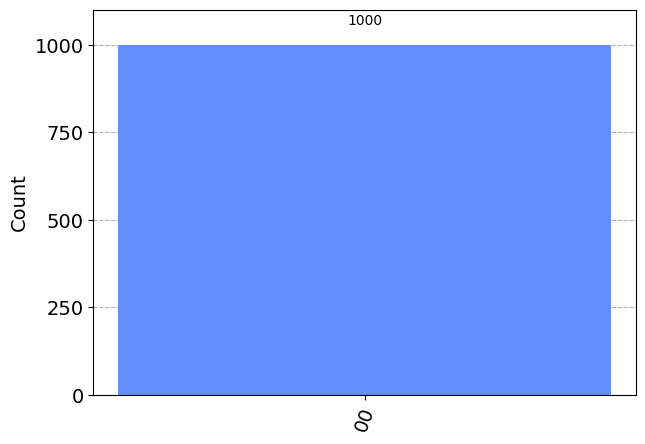

Función constante 1


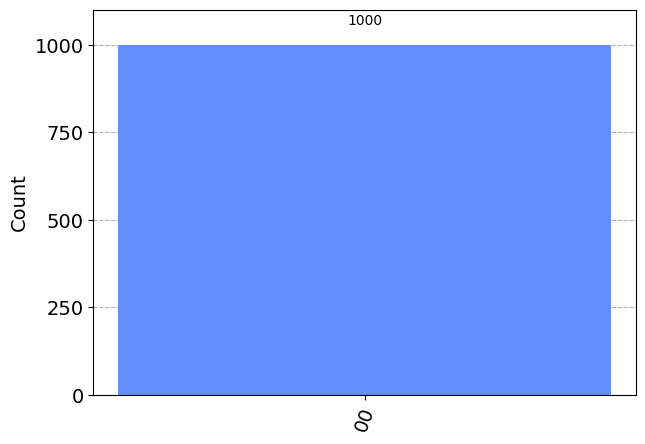

Función balanceada (XOR)


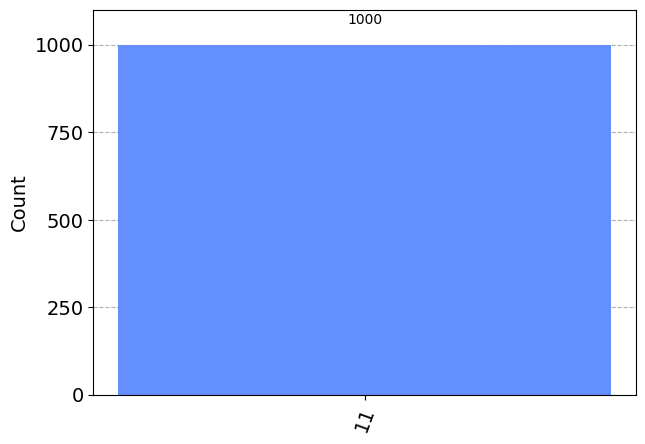

Función balanceada (Complementario XOR)


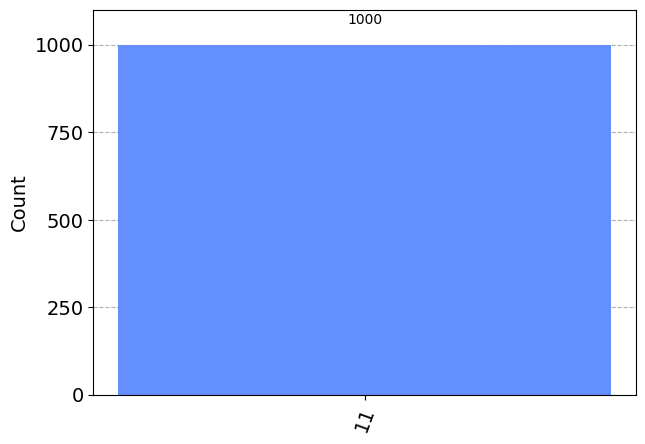

Función constante 0 (alt)


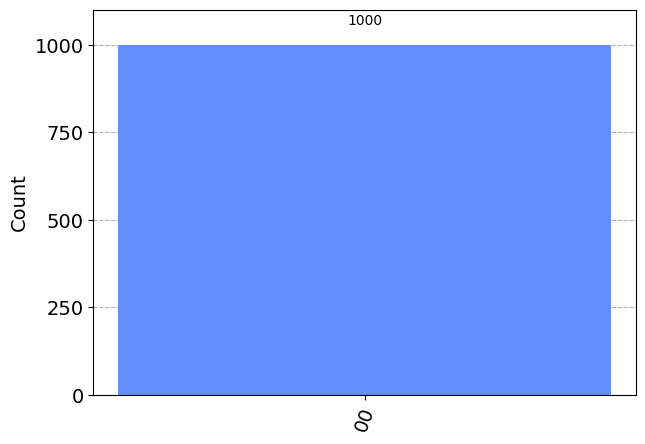

Función constante 1 (alt)


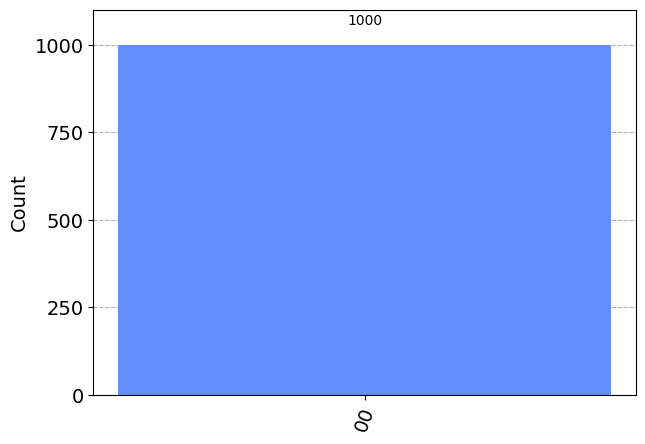

Función balanceada (alt)


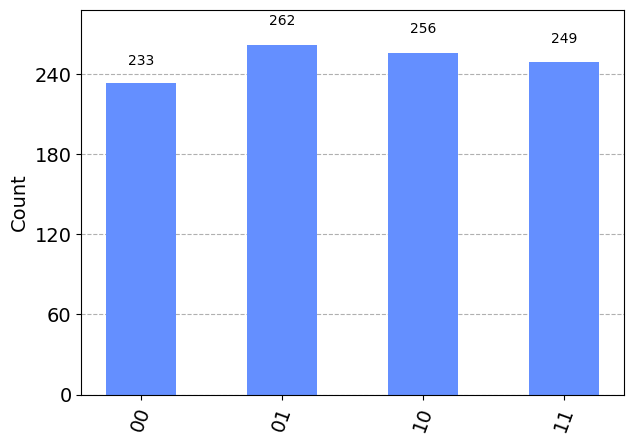

In [14]:
oraculos = ['0', '1', 'XOR', 'NXOR', '0Alt', '1Alt', 'bAlt']

for fun in oraculos:
    # Inicialización
    deutsch_jozsa2 = QuantumCircuit(3,2)

    # Oráculo específico para cada función
    match fun:
        case '0':
            deutsch_jozsa(deutsch_jozsa2, funcion_constante_2qubits_0)
            print("Función constante 0")
        case '1':
            deutsch_jozsa(deutsch_jozsa2, funcion_constante_2qubits_1)
            print("Función constante 1")
        case 'XOR':
            deutsch_jozsa(deutsch_jozsa2, funcion_balanceada_2qubits_XOR)
            print("Función balanceada (XOR)")
        case 'NXOR':
            deutsch_jozsa(deutsch_jozsa2, funcion_balanceada_2qubits_NegXOR)
            print("Función balanceada (Complementario XOR)")

        case '0Alt':
            deutsch_jozsa(deutsch_jozsa2, funcion_constante_2qubits_0_alt)
            print("Función constante 0 (alt)")
        case '1Alt':
            deutsch_jozsa(deutsch_jozsa2, funcion_constante_2qubits_1_alt)
            print("Función constante 1 (alt)")
        case 'bAlt':
            deutsch_jozsa(deutsch_jozsa2, funcion_balanceada_2qubits_alt)
            print("Función balanceada (alt)")

    simulator = AerSimulator()
    result = simulator.run(deutsch_jozsa2, shots=1000).result()
    counts = result.get_counts()
    display(plot_histogram(counts))

Obtenemos los resultados esperados. A continuación, se muestran los resultados de la ejecución en backends reales para algunas funciones.

Función constante 0


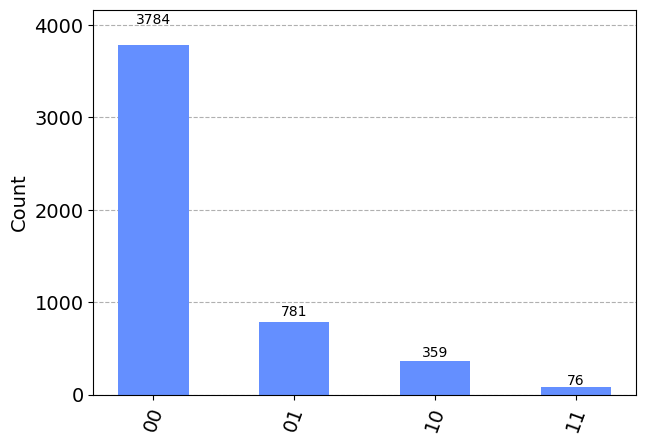

Función constante 1


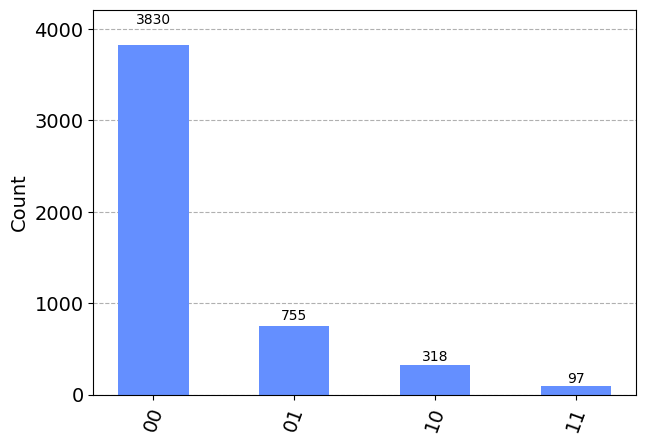

Función balanceada (XOR)


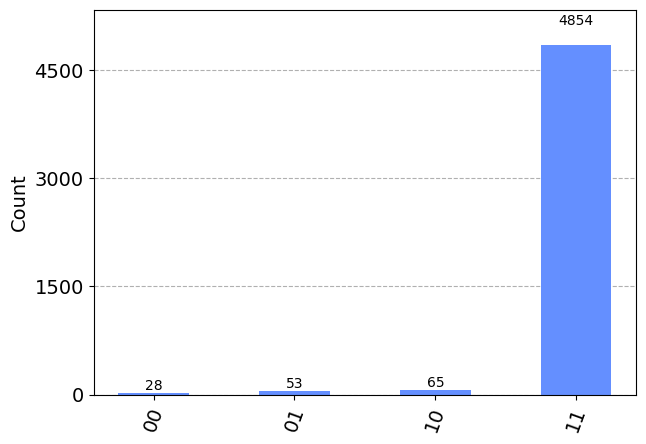

Función balanceada (Complementario XOR)


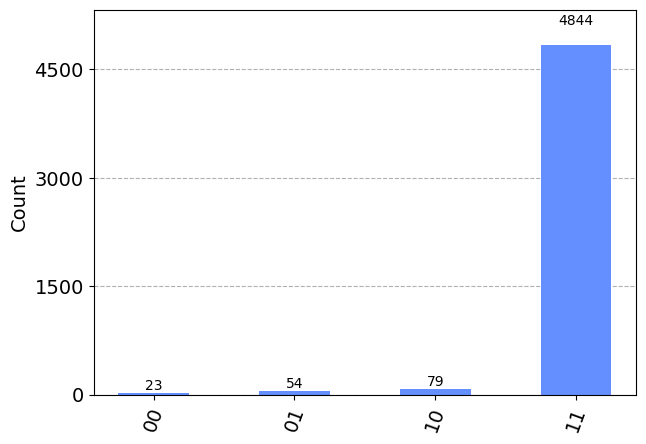

Función constante 0 (alt)


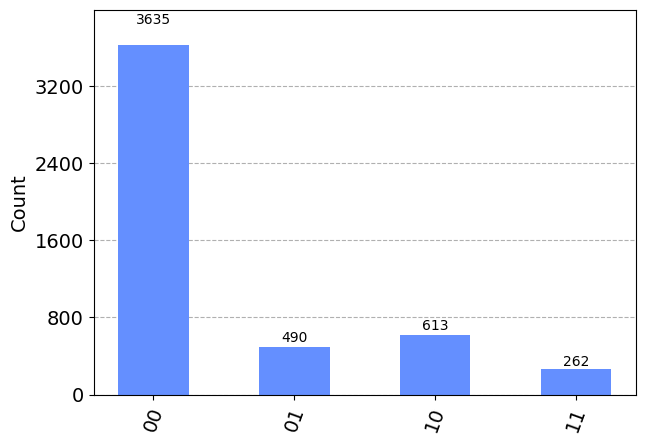

Función constante 1 (alt)


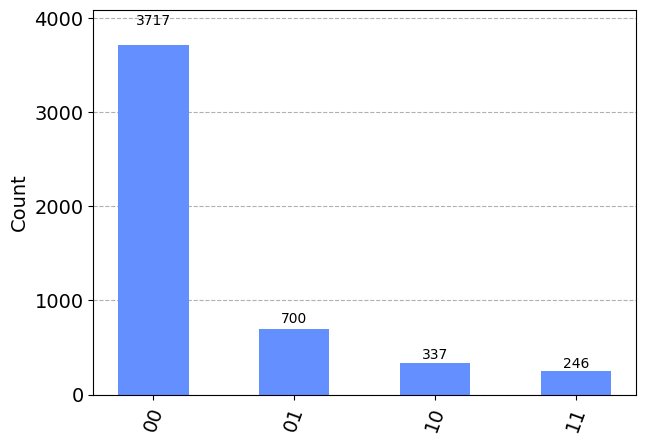

Función balanceada (alt)


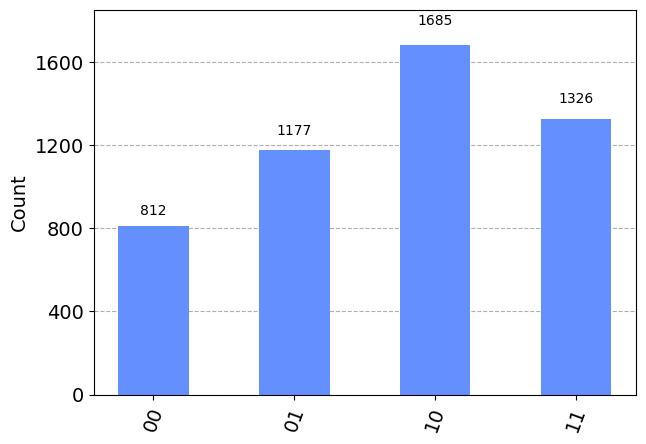

In [25]:
oraculos = ['0', '1', 'XOR', 'NXOR', '0Alt', '1Alt', 'bAlt']

backend = service.least_busy(operational=True, simulator=False, min_num_qubits= 3)

for fun in oraculos:
    # Inicialización
    deutsch_jozsa2 = QuantumCircuit(3,2)

    # Oráculo específico para cada función
    match fun:
        case '0':
            deutsch_jozsa(deutsch_jozsa2, funcion_constante_2qubits_0)
            print("Función constante 0")
        case '1':
            deutsch_jozsa(deutsch_jozsa2, funcion_constante_2qubits_1)
            print("Función constante 1")
        case 'XOR':
            deutsch_jozsa(deutsch_jozsa2, funcion_balanceada_2qubits_XOR)
            print("Función balanceada (XOR)")
        case 'NXOR':
            deutsch_jozsa(deutsch_jozsa2, funcion_balanceada_2qubits_NegXOR)
            print("Función balanceada (Complementario XOR)")

        case '0Alt':
            deutsch_jozsa(deutsch_jozsa2, funcion_constante_2qubits_0_alt)
            print("Función constante 0 (alt)")
        case '1Alt':
            deutsch_jozsa(deutsch_jozsa2, funcion_constante_2qubits_1_alt)
            print("Función constante 1 (alt)")
        case 'bAlt':
            deutsch_jozsa(deutsch_jozsa2, funcion_balanceada_2qubits_alt)
            print("Función balanceada (alt)")

    deutsch_jozsa2 = transpile(deutsch_jozsa2, backend)
    job = backend.run(deutsch_jozsa2, shots=5000)    
    counts = job.result().get_counts(deutsch_jozsa2)
    display(plot_histogram(counts))

Las ejecuciones anteriores han sido realizadas sobre el backend ibm_kyoto. Observamos que los resultados mayoritarios coinciden con los esperados, y el error introducido es pequeño.

**Implementación para 3 qubits.**

In [18]:
# Funciones constantes y balanceadas para 3 qubits
def funcion_constante_3qubits_0(qc):
    pass  # Identidad
def funcion_constante_3qubits_1(qc):
    qc.x(2)
def funcion_balanceada_3qubits_XOR(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
def funcion_balanceada_3qubits_NegXOR(qc):
    funcion_balanceada_3qubits_XOR(qc)
    qc.x(3)

# Funciones alternativas
def funcion_constante_3qubits_0_alt(qc):
    qc.cx(0,3)
    qc.x(0)
    qc.cx(0,3)
    qc.cx(1,3)
    qc.x(1)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.x(2)
    qc.cx(2,3)
def funcion_balanceada_3qubits_alt(qc):
    qc.cx(2,3)
    qc.cx(1,3)
    qc.ccx(0,1,3)

Función constante 0


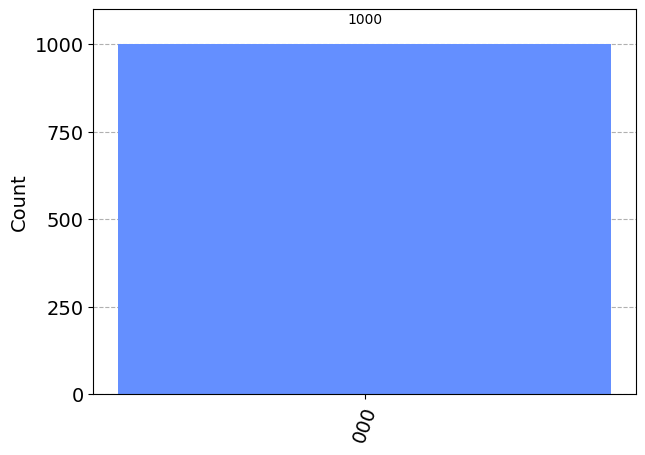

Función constante 1


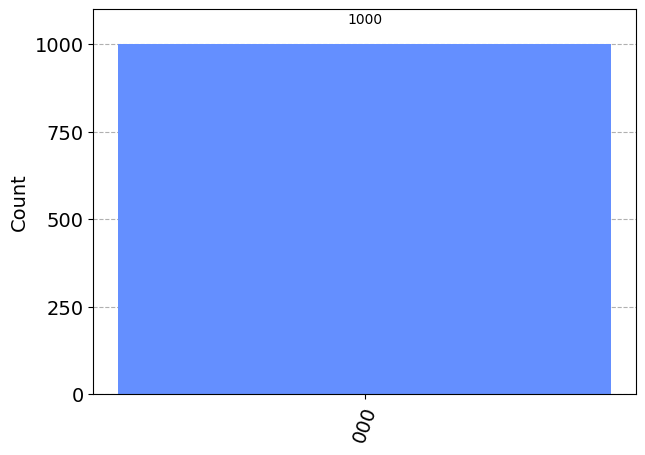

Función balanceada (XOR)


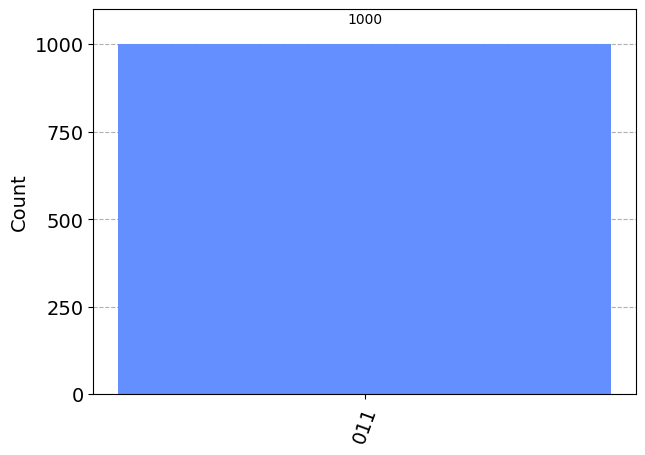

Función balanceada (Complementario XOR)


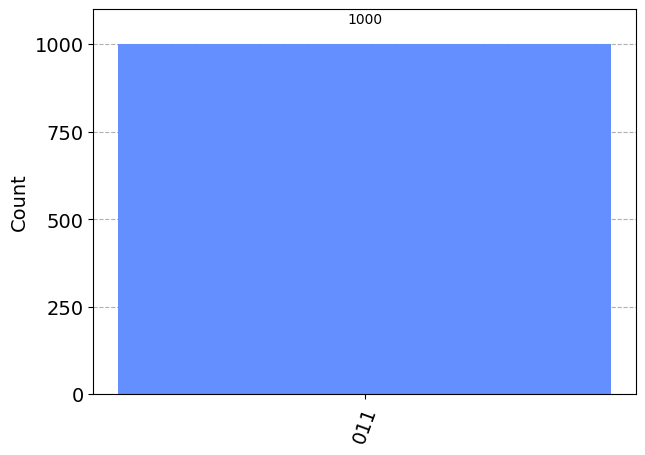

Función constante 0 (alt)


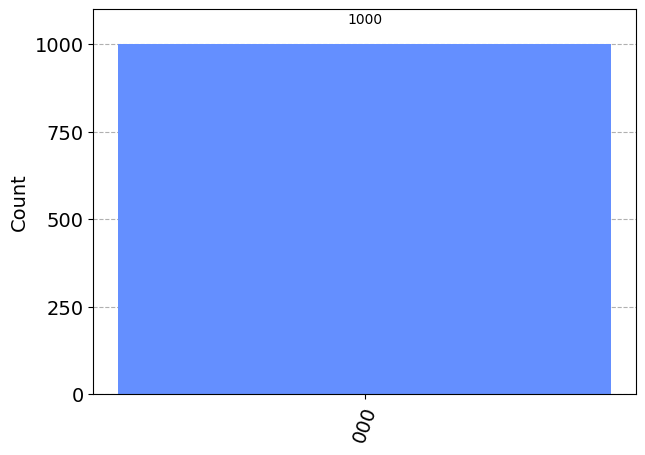

Función balanceada (alt)


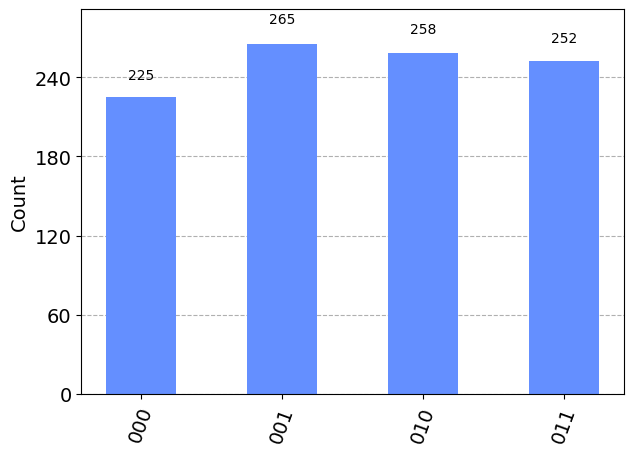

In [19]:
oraculos = ['0', '1', 'XOR', 'NXOR', '0Alt', 'bAlt']

for fun in oraculos:
    # Inicialización
    deutsch_jozsa3 = QuantumCircuit(4,3)

    # Oráculo específico para cada función
    match fun:
        case '0':
            deutsch_jozsa(deutsch_jozsa3, funcion_constante_3qubits_0)
            print("Función constante 0")
        case '1':
            deutsch_jozsa(deutsch_jozsa3, funcion_constante_3qubits_1)
            print("Función constante 1")
        case 'XOR':
            deutsch_jozsa(deutsch_jozsa3, funcion_balanceada_3qubits_XOR)
            print("Función balanceada (XOR)")
        case 'NXOR':
            deutsch_jozsa(deutsch_jozsa3, funcion_balanceada_3qubits_NegXOR)
            print("Función balanceada (Complementario XOR)")

        case '0Alt':
            deutsch_jozsa(deutsch_jozsa3, funcion_constante_3qubits_0_alt)
            print("Función constante 0 (alt)")
        case 'bAlt':
            deutsch_jozsa(deutsch_jozsa3, funcion_balanceada_3qubits_alt)
            print("Función balanceada (alt)")

    simulator = AerSimulator()
    result = simulator.run(deutsch_jozsa3, shots=1000).result()
    counts = result.get_counts()
    display(plot_histogram(counts))

Obtenemos los resultados esperados. A continuación, se muestran los resultados de la ejecución en backends reales para algunas funciones.

Función constante 0


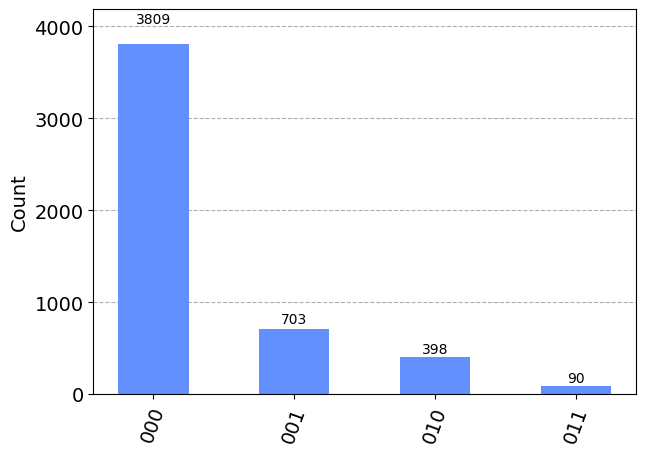

Función constante 1


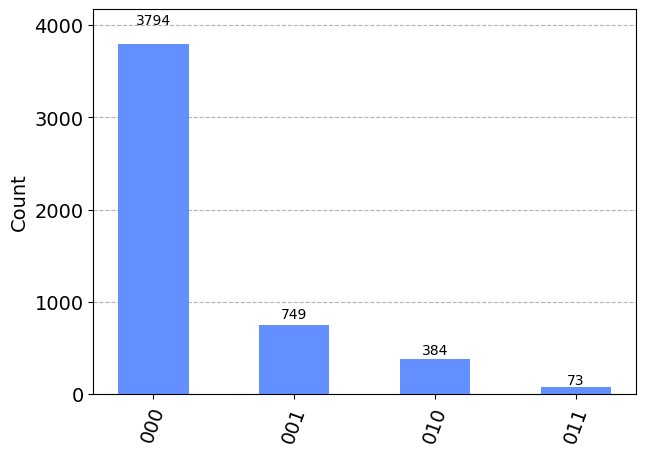

Función balanceada (XOR)


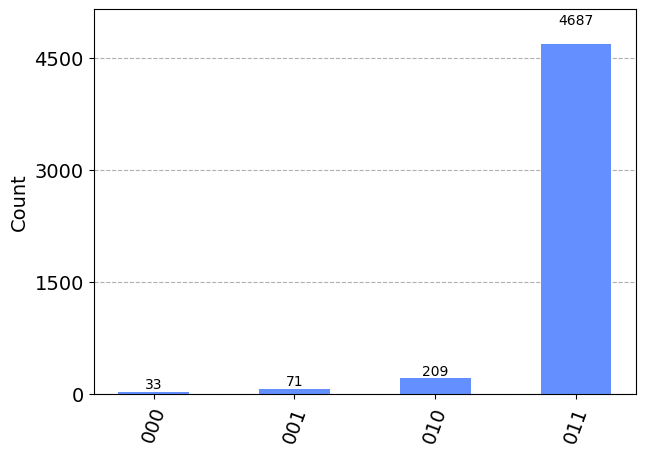

Función balanceada (Complementario XOR)


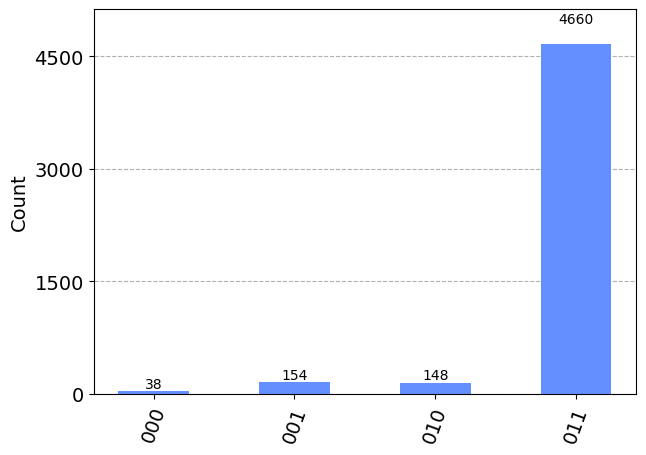

Función constante 0 (alt)


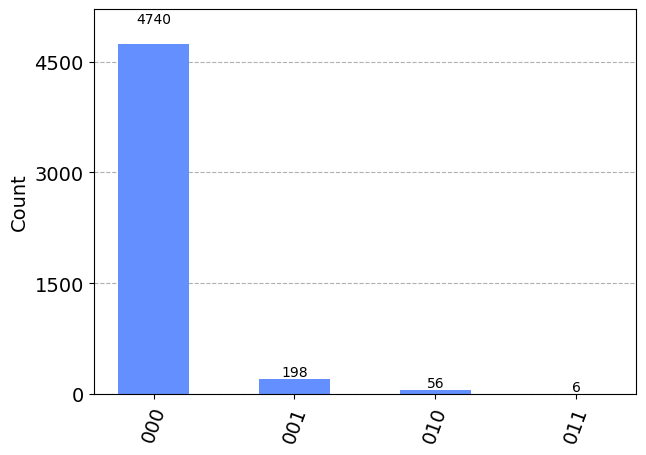

Función balanceada (alt)


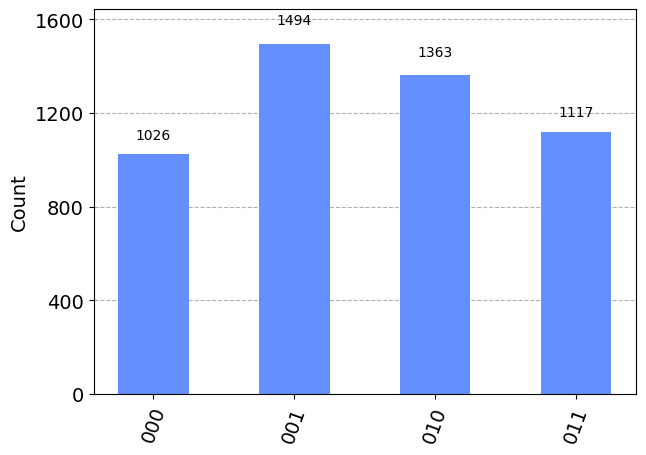

In [26]:
oraculos = ['0', '1', 'XOR', 'NXOR', '0Alt', 'bAlt']

backend = service.least_busy(operational=True, simulator=False, min_num_qubits= 4)

for fun in oraculos:
    # Inicialización
    deutsch_jozsa3 = QuantumCircuit(4,3)

    # Oráculo específico para cada función
    match fun:
        case '0':
            deutsch_jozsa(deutsch_jozsa3, funcion_constante_3qubits_0)
            print("Función constante 0")
        case '1':
            deutsch_jozsa(deutsch_jozsa3, funcion_constante_3qubits_1)
            print("Función constante 1")
        case 'XOR':
            deutsch_jozsa(deutsch_jozsa3, funcion_balanceada_3qubits_XOR)
            print("Función balanceada (XOR)")
        case 'NXOR':
            deutsch_jozsa(deutsch_jozsa3, funcion_balanceada_3qubits_NegXOR)
            print("Función balanceada (Complementario XOR)")

        case '0Alt':
            deutsch_jozsa(deutsch_jozsa3, funcion_constante_3qubits_0_alt)
            print("Función constante 0 (alt)")
        case 'bAlt':
            deutsch_jozsa(deutsch_jozsa3, funcion_balanceada_3qubits_alt)
            print("Función balanceada (alt)")

    deutsch_jozsa3 = transpile(deutsch_jozsa3, backend)
    job = backend.run(deutsch_jozsa3, shots=5000)    
    counts = job.result().get_counts(deutsch_jozsa3)
    display(plot_histogram(counts))

Las ejecuciones anteriores han sido realizadas sobre el backend *ibm_kyoto*. Observamos que los resultados mayoritarios coinciden con los esperados, y el error introducido es pequeño. 